In [1]:
# -*- coding: utf-8 -*-\

# import libraries
import time
import numpy as np
import pandas as pd
import pickle
from datetime import date, datetime, timedelta

# Visualization
import matplotlib
import matplotlib.pyplot as plt  # visualization
from matplotlib import font_manager, rc  # Matplotlib Config.
import seaborn as sns

# plt.style.use('ggplot')
# set seaborn theme and style
sns.set_theme()
sns.set_style("ticks")
# Pandas Config.
# For the default setting: reset_option(param)
pd.set_option("display.max_rows", 100)  # 출력할 행의 수
pd.set_option(
    "display.max_columns", None
)  # 출력할 열의 수; None for the entire columns
pd.set_option("display.max_colwidth", 1000)  # 열의 너비; None for the entire columns
pd.set_option(
    "display.precision", 3
)  # 소수점 자리수; precision in terms of decimal places
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x
)  # Format scientific notation from Pandas
# pd.options.display.float_format = '{:.5f}'.format

import matplotlib as mpl

# NanumGothic 설정 확인
plt.rcParams["font.family"] = "AppleGothic"
print(plt.rcParams["font.family"])  # NanumGothic 설정 제대로 먹힌 것을 확인!!!

# 마이너스(-)가 '□'로 깨지는 것을 방지하기 위하여 설정!!!
mpl.rcParams["axes.unicode_minus"] = False

['AppleGothic']


In [2]:
!pwd

/Users/donginkim/git/ipynb


In [4]:
path = "./data/credit_card/"
df = pd.read_csv(path + "cc_general.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.901,0.818,95.400,0.000,95.400,0.000,0.167,0.000,0.083,0.000,0,2,1000.000,201.802,139.510,0.000,12
1,C10002,3202.467,0.909,0.000,0.000,0.000,6442.945,0.000,0.000,0.000,0.250,4,0,7000.000,4103.033,1072.340,0.222,12
2,C10003,2495.149,1.000,773.170,773.170,0.000,0.000,1.000,1.000,0.000,0.000,0,12,7500.000,622.067,627.285,0.000,12
3,C10004,1666.671,0.636,1499.000,1499.000,0.000,205.788,0.083,0.083,0.000,0.083,1,1,7500.000,0.000,NaN,0.000,12
4,C10005,817.714,1.000,16.000,16.000,0.000,0.000,0.083,0.083,0.000,0.000,0,1,1200.000,678.335,244.791,0.000,12


In [10]:
df.isnull().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [11]:
X = df.drop(columns=["cust_id"]).copy()
X.dropna(inplace=True)

In [12]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

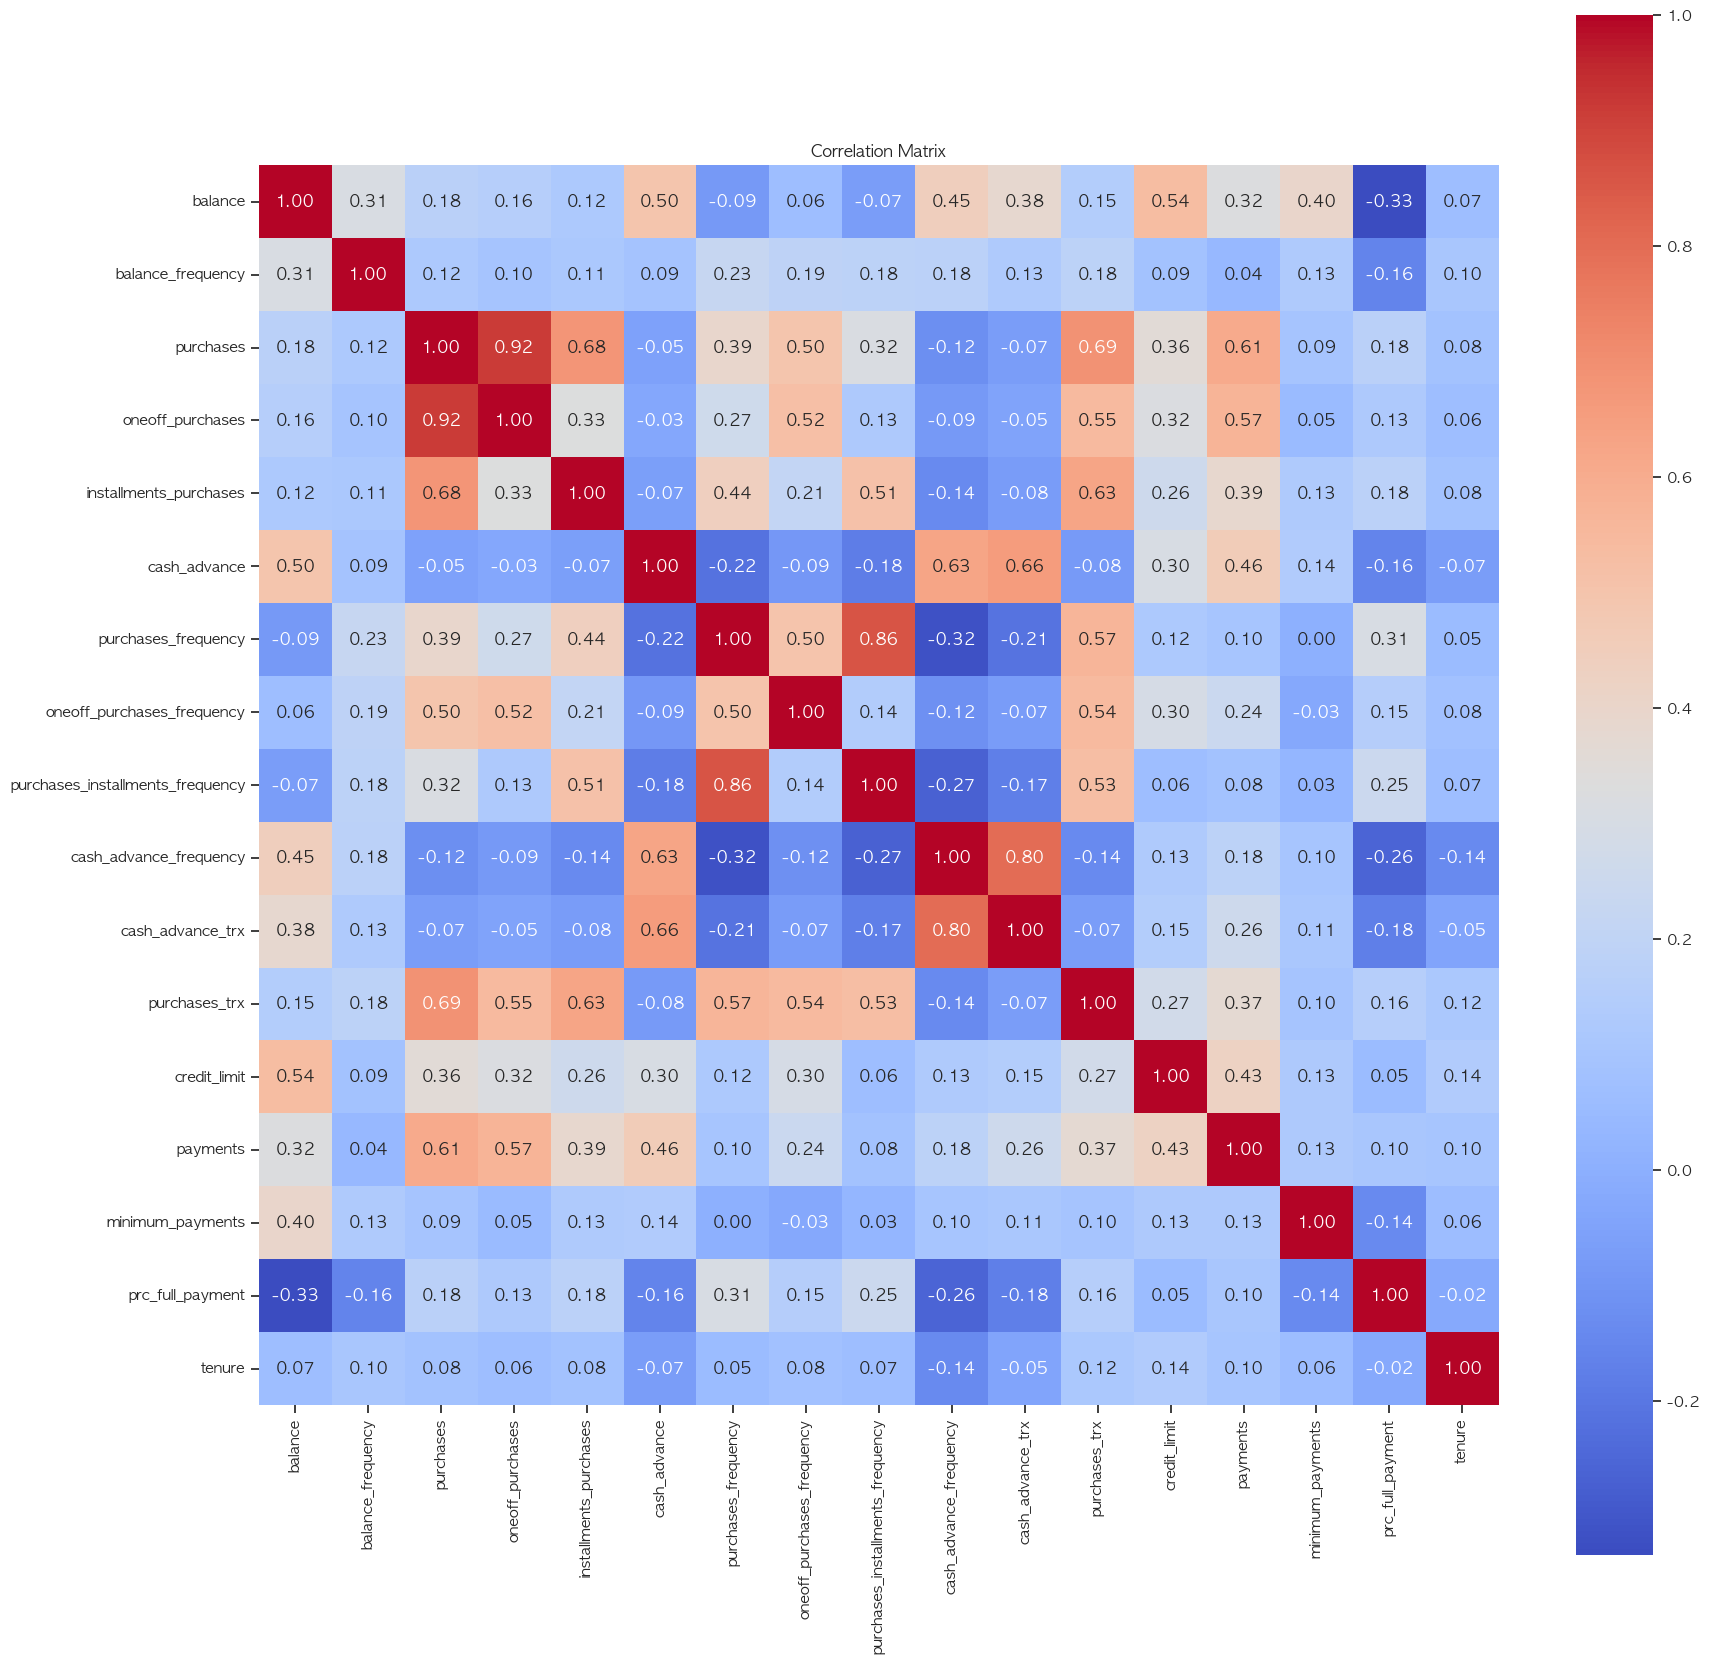

In [13]:
# correlation matrix
corr = X.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

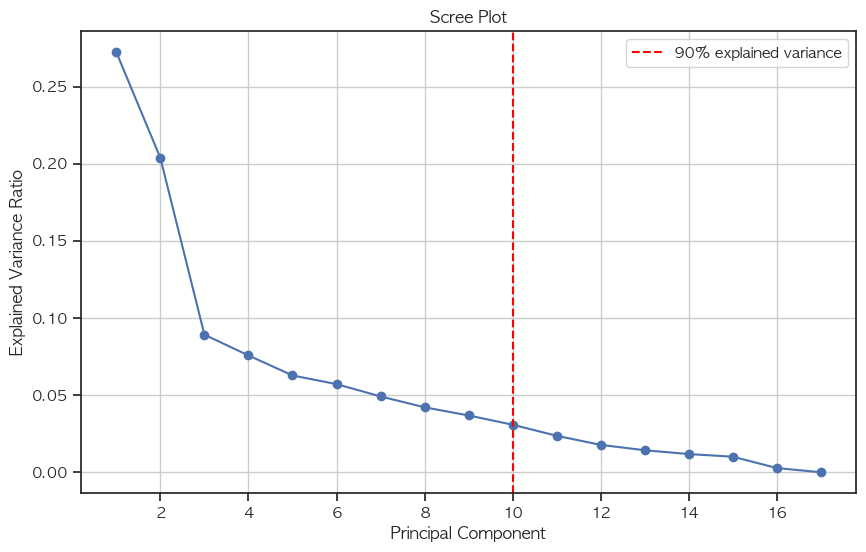

In [21]:
# PCA
from sklearn.decomposition import PCA

# variance explained ratio
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
# print("Explained variance ratio:", explained_variance_ratio)

# Cumulative explained variance ratio
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()
# print("Cumulative explained variance ratio:", cumulative_explained_variance_ratio)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_,
    marker="o",
    linestyle="-",
)

# vertical line for 90% variance explained
# vertical line for cumulative explained variance ratio > 0.95
plt.axvline(
    x=(cumulative_explained_variance_ratio > 0.90).argmax() + 1,
    color="red",
    linestyle="--",
    label="90% explained variance",
)
# plt.axvline(x=3, color="b", linestyle="--")
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.legend()
plt.show()

In [22]:
# PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

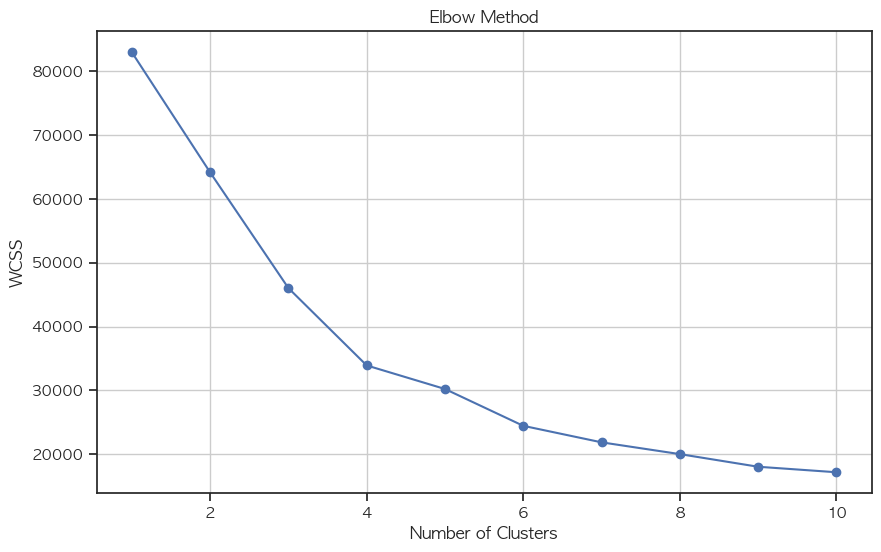

In [41]:
# KMeans++
from sklearn.cluster import KMeans

# Elbow Method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
# print(wcss)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker="o", linestyle="-")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [44]:
# KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)
X["cluster_km"] = y_kmeans.astype(str)

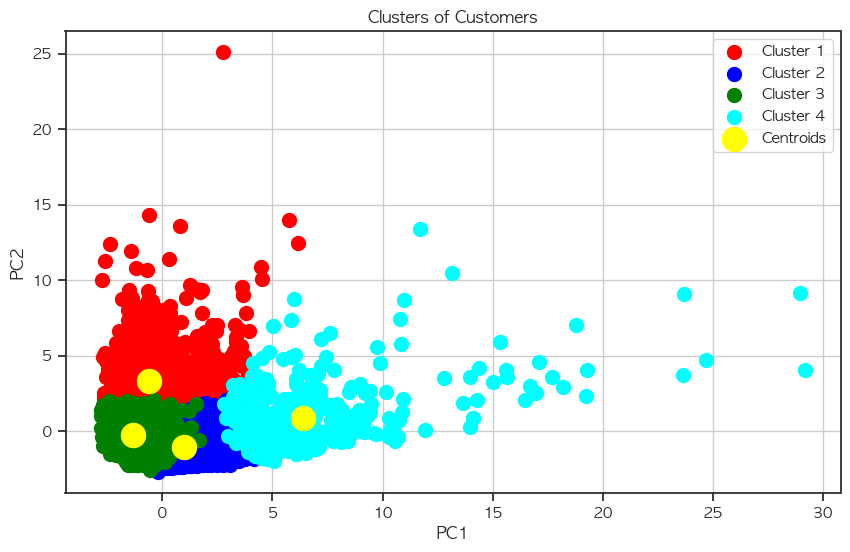

In [45]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    X_pca[y_kmeans == 0, 0],
    X_pca[y_kmeans == 0, 1],
    s=100,
    c="red",
    label="Cluster 1",
)
plt.scatter(
    X_pca[y_kmeans == 1, 0],
    X_pca[y_kmeans == 1, 1],
    s=100,
    c="blue",
    label="Cluster 2",
)
plt.scatter(
    X_pca[y_kmeans == 2, 0],
    X_pca[y_kmeans == 2, 1],
    s=100,
    c="green",
    label="Cluster 3",
)
plt.scatter(
    X_pca[y_kmeans == 3, 0],
    X_pca[y_kmeans == 3, 1],
    s=100,
    c="cyan",
    label="Cluster 4",
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c="yellow",
    label="Centroids",
)
plt.title("Clusters of Customers")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

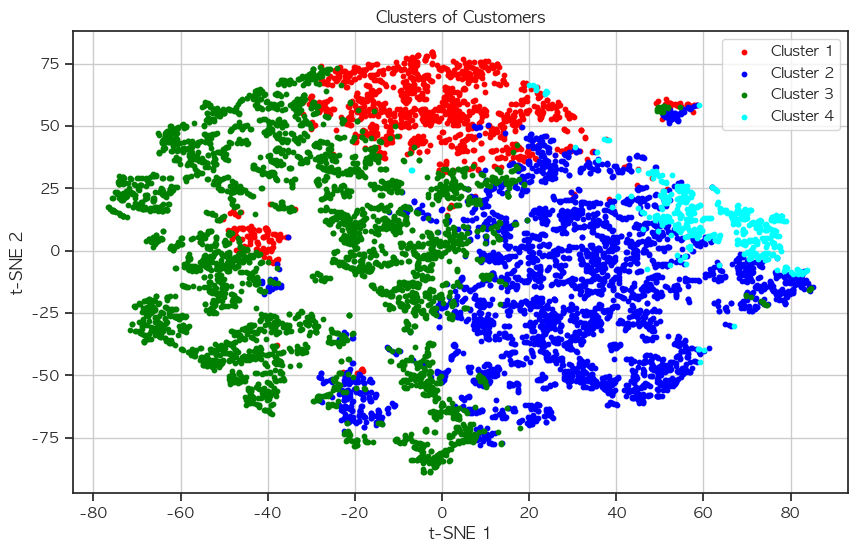

In [49]:
# t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(
    X_tsne[y_kmeans == 0, 0],
    X_tsne[y_kmeans == 0, 1],
    s=10,
    c="red",
    label="Cluster 1",
)
plt.scatter(
    X_tsne[y_kmeans == 1, 0],
    X_tsne[y_kmeans == 1, 1],
    s=10,
    c="blue",
    label="Cluster 2",
)
plt.scatter(
    X_tsne[y_kmeans == 2, 0],
    X_tsne[y_kmeans == 2, 1],
    s=10,
    c="green",
    label="Cluster 3",
)

plt.scatter(
    X_tsne[y_kmeans == 3, 0],
    X_tsne[y_kmeans == 3, 1],
    s=10,
    c="cyan",
    label="Cluster 4",
)

plt.title("Clusters of Customers")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_pca)

# Number of clusters
n_clusters = len(np.unique(clusters))
print("Number of clusters:", n_clusters)

# Silhouette score 
from sklearn.metrics import silhouette_score

silhouette_score(X_pca, clusters)

Number of clusters: 10


0.03007044057697447

In [28]:
X["cluster_dbscan"] = clusters.astype(str)

In [26]:
X.groupby("cluster").mean()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
cluster,,,,,,,,,,,,,,,,,
-1,4711.723,0.939,5086.948,3463.251,1623.735,3552.795,0.716,0.484,0.532,0.274,10.248,55.692,9920.372,8105.226,3480.386,0.197,11.742
0,1369.622,0.891,723.850,392.299,331.883,801.723,0.478,0.185,0.356,0.127,2.789,11.991,4117.450,1316.949,660.152,0.155,11.517
1,374.688,0.864,6121.620,3850.015,2271.605,0.000,1.000,0.750,0.875,0.000,0.000,48.500,11750.000,4783.928,156.850,0.608,12.000
2,638.319,1.000,6482.863,3836.323,2646.540,0.000,1.000,0.958,0.990,0.000,0.000,101.250,6087.500,5971.777,209.370,0.875,12.000
3,356.299,0.991,4129.300,4072.189,57.111,0.000,0.950,0.942,0.033,0.000,0.000,28.900,8350.000,3832.573,187.858,0.894,12.000
4,6387.202,1.000,658.783,122.053,536.730,3813.942,0.976,0.119,0.917,0.369,12.571,21.286,9142.857,1773.626,2250.488,0.000,12.000
5,5867.854,1.000,43.400,43.400,0.000,10463.354,0.033,0.033,0.000,0.633,20.200,0.400,11400.000,10074.563,1514.731,0.083,12.000
6,6040.533,1.000,1023.067,325.977,697.090,5062.946,0.889,0.139,0.833,0.597,26.667,21.500,7333.333,3302.585,2609.393,0.015,12.000
7,2003.768,1.000,464.062,0.000,464.062,238.304,1.000,0.000,0.983,0.017,0.200,18.600,2240.000,431.912,14242.973,0.000,12.000


In [40]:
# OPTICS
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=20)
clusters = optics.fit_predict(X_pca)

# Number of clusters
n_clusters = len(np.unique(clusters))
print("Number of clusters:", n_clusters)

Number of clusters: 6


In [33]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
clusters = agg.fit_predict(X_pca)

X["cluster_agg"] = clusters.astype(str)

In [34]:
X.groupby("cluster_agg").mean()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster_dbscan
cluster_agg,,,,,,,,,,,,,,,,,,
0,894.261,0.870,627.055,313.481,313.879,367.492,0.497,0.165,0.371,0.074,1.319,10.825,3507.539,1070.841,548.140,0.171,11.529,0.000
1,2720.487,0.981,5760.868,3906.917,1854.800,555.256,0.934,0.735,0.719,0.068,1.625,68.382,8901.627,5556.923,1198.610,0.314,11.898,1.000
2,4253.786,0.967,495.021,296.836,198.256,4051.573,0.277,0.131,0.185,0.461,13.193,7.790,6960.471,3158.288,2132.593,0.030,11.378,2.000


In [46]:
# Gaussian Mixture Model
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
clusters = gmm.fit_predict(X_pca)

X["cluster_gmm"] = clusters.astype(str)